# Sentiment Analysis Notebook

This notebook executes the sentiment analysis pipeline and visualizes the results.

**Steps:**
1.  **Run Pipeline:** Execute the `SentimentAnalysis` pipeline to process text and calculate VADER sentiment scores.
2.  **Analyze Results:** Explore the distribution of sentiments across different banks.
3.  **Visualize:** Create charts to understand customer sentiment trends.

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add project root to path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.sentiment_vader import SentimentAnalysis
from src.config import DATA_PATHS

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## 1. Run Sentiment Analysis Pipeline

We will initialize and run the `SentimentAnalysis` pipeline. This will:
1.  Load the preprocessed data.
2.  Perform additional text preparation (tokenization, lemmatization).
3.  Calculate VADER sentiment scores.
4.  Save the results.

In [2]:
# Initialize and run the pipeline
analyzer = SentimentAnalysis()
success = analyzer.run_pipeline()

if success:
    print("Pipeline executed successfully.")
else:
    print("Pipeline failed.")

STARTING VADER SENTIMENT ANALYSIS PIPELINE
Loading processed data...
Loaded 9848 reviews

[1/3] Running VADER Sentiment Analysis...
Calculating sentiment scores...

Sentiment Distribution:
sentiment_label
positive    64.581641
neutral     23.558083
negative    11.860276
Name: proportion, dtype: float64

Per-Bank Mean Sentiment Score by Star Rating:
rating                           1      2      3      4      5
bank_name                                                     
Abyssinia Bank              -0.194 -0.038  0.160  0.311  0.366
Commercial Bank of Ethiopia -0.076  0.015  0.201  0.360  0.408
Dashen Bank                 -0.099  0.083  0.299  0.357  0.514

[2/3] Evaluating sentiment predictions...

SENTIMENT EVALUATION: VADER
Reviews evaluated: 9848

--- 3 Essential Metrics ---
  Overall Accuracy:      66.2%
  Negative Recall:       40.5%    ← Did we catch the complaints?
  Score-Rating Corr:     0.521

--- Full Classification Report ---
              precision    recall  f1-score   

## 1.5 Evaluation & Coverage Check

Evaluate VADER sentiment predictions against star ratings as ground truth:
- **1-2 stars** → negative
- **3 stars** → neutral
- **4-5 stars** → positive

Three essential metrics: **Overall Accuracy**, **Negative Recall** (did we catch the complaints?), **Score-Rating Correlation**.

In [3]:
# Evaluate sentiment predictions against star ratings
from src.sentiment_evaluation import evaluate_sentiment

# Load the VADER results
import pandas as pd
from src.config import DATA_PATHS

df_eval = pd.read_csv(DATA_PATHS['sentiment_results_vader'])
eval_results = evaluate_sentiment(df_eval, model_name='VADER')


SENTIMENT EVALUATION: VADER
Reviews evaluated: 9848

--- 3 Essential Metrics ---
  Overall Accuracy:      66.2%
  Negative Recall:       40.5%    ← Did we catch the complaints?
  Score-Rating Corr:     0.521

--- Full Classification Report ---
              precision    recall  f1-score   support

    negative       0.75      0.40      0.52      2151
     neutral       0.07      0.29      0.12       576
    positive       0.86      0.77      0.81      7121

    accuracy                           0.66      9848
   macro avg       0.56      0.49      0.48      9848
weighted avg       0.79      0.66      0.71      9848



In [4]:
# Coverage Check (Rubric KPI: >90% of reviews must have sentiment scores)
coverage = df_eval['sentiment_score'].notna().mean() * 100
print(f'Sentiment Coverage: {coverage:.1f}%')
if coverage >= 90:
    print('✅ Coverage meets rubric requirement (>90%)')
else:
    print(f'⚠️ Coverage below 90% threshold — {100 - coverage:.1f}% reviews missing scores')

Sentiment Coverage: 100.0%
✅ Coverage meets rubric requirement (>90%)


## Evaluation Interpretation 
### The model has an overall accuracy of 66% which is low accuracy.
### When we look deeper into the results, we see that the model is performing very badly on negative and neutral reviews. It's negative recall is 40% meaning that it failed to capture 60% of the negative reviews. This is not a good sign, our main focus is to capture negative reviews and present pain points to the bank.
## The model performs poorly with neutral reviews, getting a neutral precision of 7% means that it failed to capture 93% of the neutral reviews. Usually neutral reviews are not of much value to the bank, but it's still important to capture them as they can provide insights into the customer's experience.
## The model performs well with positive reviews, having a precision and recall of 0.86 and 0.77. This is a good sign as it helps to find positive reviews and present positive experiences to the bank as the drivers of customer satisfaction.

## 2. Data Analysis & Visualization

Now that we have the sentiment scores, let's analyze the results. We will look at the distribution of sentiments and explore some examples.

In [6]:
# Load the results
results_path = DATA_PATHS['sentiment_results_vader']
df_sentiment = pd.read_csv(results_path)

print(f"Loaded {len(df_sentiment)} analyzed reviews.")
df_sentiment.head()

Loaded 9848 analyzed reviews.


,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source,sentiment_score,sentiment_label
0,df20cbb3-6c0a-407b-9b4c-c761713ce51e,it crush every time you opend it it is hard to...,1,2026-02-17,2026,2,Abyssinia,Abyssinia Bank,Yohannes Tariku,0,71,Google Play,-0.3400,negative
1,c15244f8-25e1-4fca-9ed1-daf0e9ac0e2e,it is a best app,5,2026-02-16,2026,2,Abyssinia,Abyssinia Bank,gadisa worku,0,16,Google Play,0.6369,positive
2,5bc9361c-080d-46e3-8671-94ac9f69c029,"this app is useless, i try to use it but the a...",1,2026-02-15,2026,2,Abyssinia,Abyssinia Bank,Fitsum Alemayehu,0,166,Google Play,-0.8047,negative
3,2b184e78-5b24-4948-af50-ea702dc35ebd,"It’s very hard, it’s not working.👎👎",1,2026-02-11,2026,2,Abyssinia,Abyssinia Bank,Yemaryam lij Yemaryam lij,0,35,Google Play,-0.1761,negative
4,b642100d-0a91-4481-8719-d1ca5d02d5a2,v.good,5,2026-02-11,2026,2,Abyssinia,Abyssinia Bank,Zerihun Beyene,0,6,Google Play,0.0000,neutral


C:\Users\yeget\AppData\Local\Temp\ipykernel_24740\2680938572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sentiment, x='sentiment_label', order=['negative', 'neutral', 'positive'], palette='viridis')


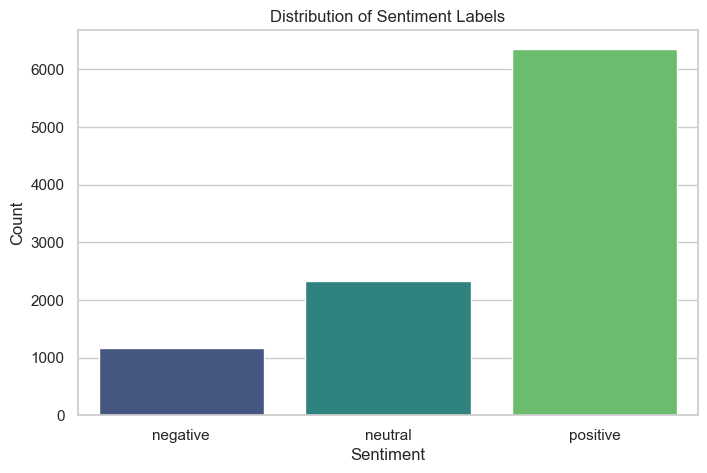

sentiment_label
positive    64.581641
neutral     23.558083
negative    11.860276
Name: proportion, dtype: float64


In [7]:
# Sentiment Label Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_sentiment, x='sentiment_label', order=['negative', 'neutral', 'positive'], palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Print percentage distribution
print(df_sentiment['sentiment_label'].value_counts(normalize=True) * 100)

## It can be seen that there are more positive sentiments let's see the distribution of sentiments across different banks.

## Sentiment Distribution by Bank

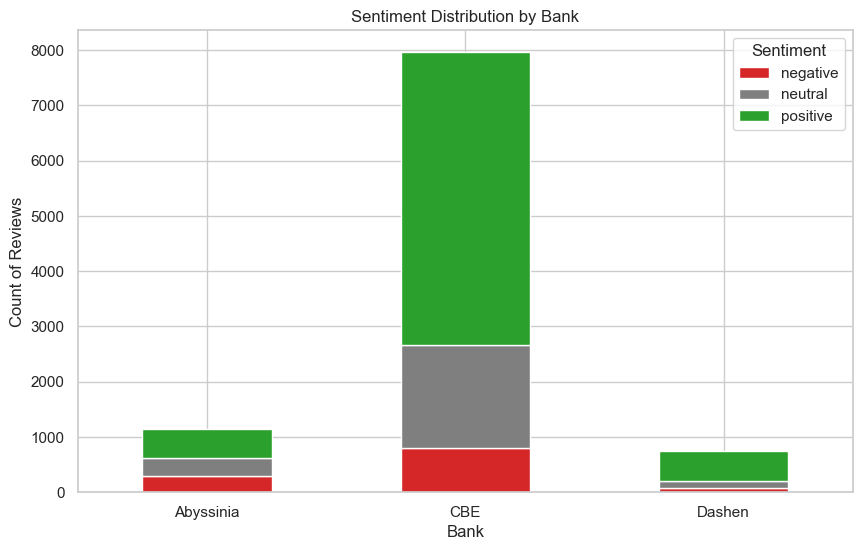

In [8]:
# Sentiment Distribution by Bank (Stacked Bar Chart)
# Create a cross-tabulation of Bank vs Sentiment
sentiment_by_bank = pd.crosstab(df_sentiment['bank_code'], df_sentiment['sentiment_label'])

# Reorder columns for logical stacking: Negative -> Neutral -> Positive
sentiment_by_bank = sentiment_by_bank[['negative', 'neutral', 'positive']]

# Plot stacked bar chart
sentiment_by_bank.plot(kind='bar', stacked=True, color=['#d62728', '#7f7f7f', '#2ca02c'], figsize=(10, 6))

plt.title('Sentiment Distribution by Bank')
plt.xlabel('Bank')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.show()

## Across each bank , we can see a higher amount of positive sentiments compared to negative and neutral ones. This indicates that customers generally have a favorable view of these fintech apps.

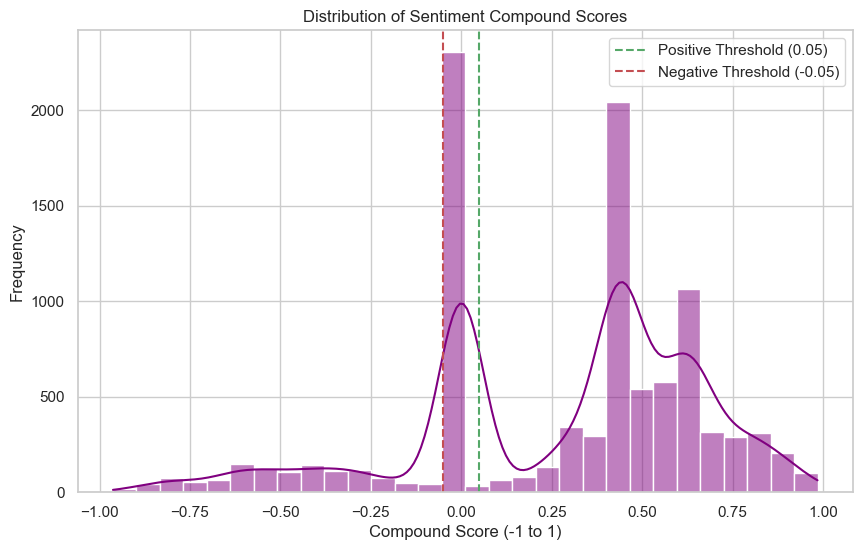

In [9]:
# Sentiment Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_sentiment['sentiment_score'], bins=30, kde=True, color='purple')
plt.title('Distribution of Sentiment Compound Scores')
plt.xlabel('Compound Score (-1 to 1)')
plt.ylabel('Frequency')
plt.axvline(x=0.05, color='g', linestyle='--', label='Positive Threshold (0.05)')
plt.axvline(x=-0.05, color='r', linestyle='--', label='Negative Threshold (-0.05)')
plt.legend()
plt.show()

## The distibution of sentiment scores shows a more positoive skew, indicating that customers generally have favorable opinions about the fintech apps. The highest concerntration of sentiment scores appears to be in the neutral range, suggesting that while many customers have positive views, there is still a significant portion with moderate opinions.

## The distrubtion shows that there aren't extreme positiives or extreme negatives, indicating that most customers have balanced views about the apps without strong extremes. 

## The highest concerntration of positive sentiments is observed in the 0.45 sentiment score range, indicating that many customers have a moderately positive view of the fintech apps.

In [10]:
# Sample Reviews
def print_samples(sentiment, n=3):
    print(f"\n--- Sample {sentiment.upper()} Reviews ---")
    samples = df_sentiment[df_sentiment['sentiment_label'] == sentiment]['review_text'].head(n)
    for i, text in enumerate(samples):
        print(f"{i+1}. {text}")

print_samples('positive')
print_samples('negative')
print_samples('neutral')


--- Sample POSITIVE Reviews ---
1. it is a best app
2. good
3. good

--- Sample NEGATIVE Reviews ---
1. it crush every time you opend it it is hard to pay quickly or to access
2. this app is useless, i try to use it but the app crash and log me out and this is happen again and again. i thought they will fix it on update but there is no update.
3. It’s very hard, it’s not working.👎👎

--- Sample NEUTRAL Reviews ---
1. v.good
2. the most doagusting app from ethiopian banking especially on weekdenda🤮🤮🤮🤮🤮🤮🤮
3. wondo mechesa


## 3. Sentiment vs. Star Rating

We will analyze how the calculated sentiment score correlates with the user's star rating (1-5 stars). We expect higher star ratings to have higher positive sentiment scores. We will visualize this for each bank.

C:\Users\yeget\AppData\Local\Temp\ipykernel_24740\3336824811.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bank_data, x='rating', y='sentiment_score', ax=axes[i], palette='viridis')
C:\Users\yeget\AppData\Local\Temp\ipykernel_24740\3336824811.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bank_data, x='rating', y='sentiment_score', ax=axes[i], palette='viridis')
C:\Users\yeget\AppData\Local\Temp\ipykernel_24740\3336824811.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bank_data, x='rating', y='sentiment_scor

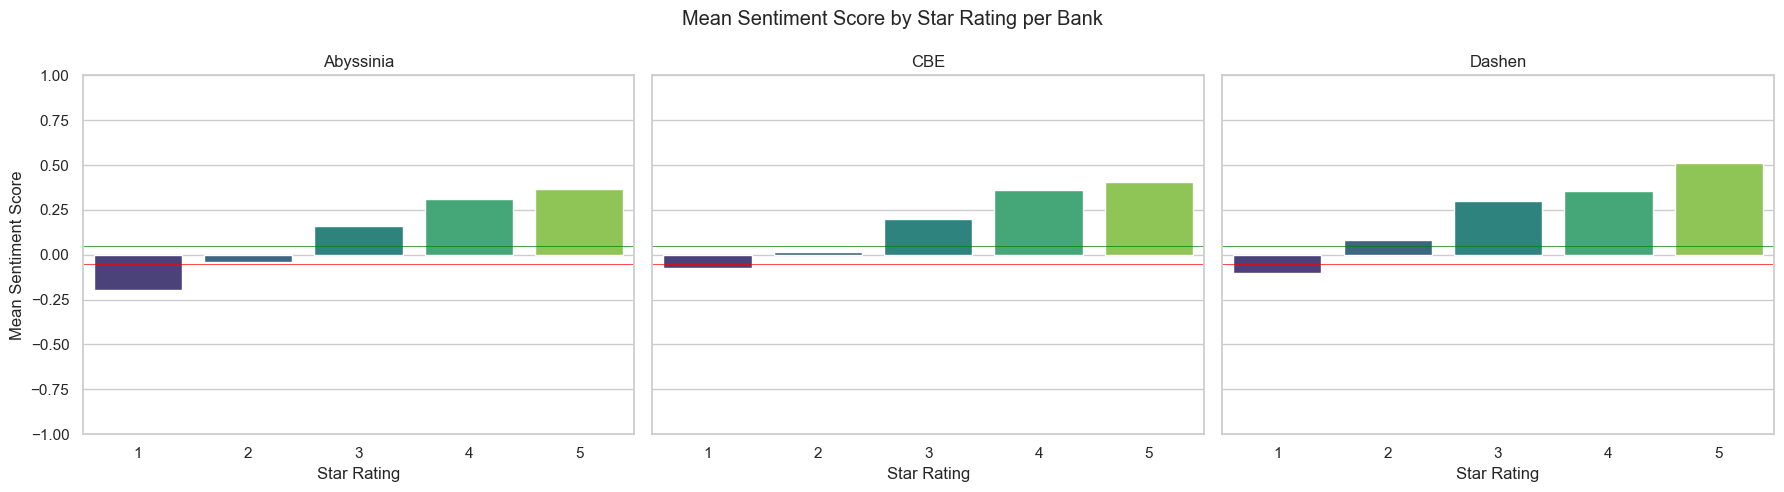

In [11]:
# Calculate mean sentiment score by Bank and Rating
# Note: Assuming 'bank_id' is the column name for the bank identifier. 
# If your column is named differently (e.g., 'app_id', 'bank_name'), please adjust accordingly.
sentiment_by_rating = df_sentiment.groupby(['bank_code', 'rating'])['sentiment_score'].mean().reset_index()

# Get unique banks
banks = df_sentiment['bank_code'].unique()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Mean Sentiment Score by Star Rating per Bank')

for i, bank in enumerate(banks):
    # Filter data for the bank
    bank_data = sentiment_by_rating[sentiment_by_rating['bank_code'] == bank]
    
    # Plot
    sns.barplot(data=bank_data, x='rating', y='sentiment_score', ax=axes[i], palette='viridis')
    
    axes[i].set_title(bank)
    axes[i].set_xlabel('Star Rating')
    axes[i].set_ylabel('Mean Sentiment Score')
    axes[i].axhline(0.05, color='green', linewidth=0.5) # Zero line
    axes[i].axhline(-0.05, color='red', linewidth=0.5) # Negative threshold line
    axes[i].set_ylim(-1, 1) # Set y-axis to full VADER range for better context

plt.tight_layout()
plt.show()

## The distribution of sentiment scores across different star ratings for each bank is interpreted as follows:

## A rating of one has a small range of neutral values and a high range of negative values - the mean for this rating is at around -0.18 indicating that customers giving a 1-star rating generally express negative sentiments about the fintech apps. But they also have some neutral sentiments as well.  The mean sentiment score for the 1-rating shows that there isn't extreme negativity, suggesting that while customers are dissatisfied, their feedback may not be overwhelmingly negative.

## A rating of two is the sparset rating and has only neutral ranges and no negatves. This suggests that customers giving a 2-star rating tend to express neutral sentiments about the fintech apps

## A rating of three only includes positive values and is meaned around 0.1 indivating that customers giving a 3-star rating generally express slightly positive sentiments about the fintech apps.

## A rating of 3 and four show only positive sentiment scores, with means around 0.3 and 0.4 respectively. This indicates that customers giving 4-star ratings express moderately positive sentiments about the fintech apps.

## It can be noted that dashen bank has the highest mean sentiment scores across all star ratings, indicating that customers of Dashen Bank generally have more positive sentiments compared to customers of other banks for the same star ratings. But this can be because only 727 reviews were taken from dashen bank compared to 3000 and 1200 from other banks.

## Time series Analysis of Sentiment Scores. Let's see how sentiment scores have evolved over time for each bank.

In [12]:
## first lets print the time span for each bank
for bank in banks:
    bank_data = df_sentiment[df_sentiment['bank_code'] == bank]
    min_date = bank_data['review_date'].min()
    max_date = bank_data['review_date'].max()
    print(f"{bank}: From {min_date} to {max_date}")

Abyssinia: From 2024-02-05 to 2026-02-17
CBE: From 2018-12-13 to 2026-02-17
Dashen: From 2025-02-16 to 2026-02-16


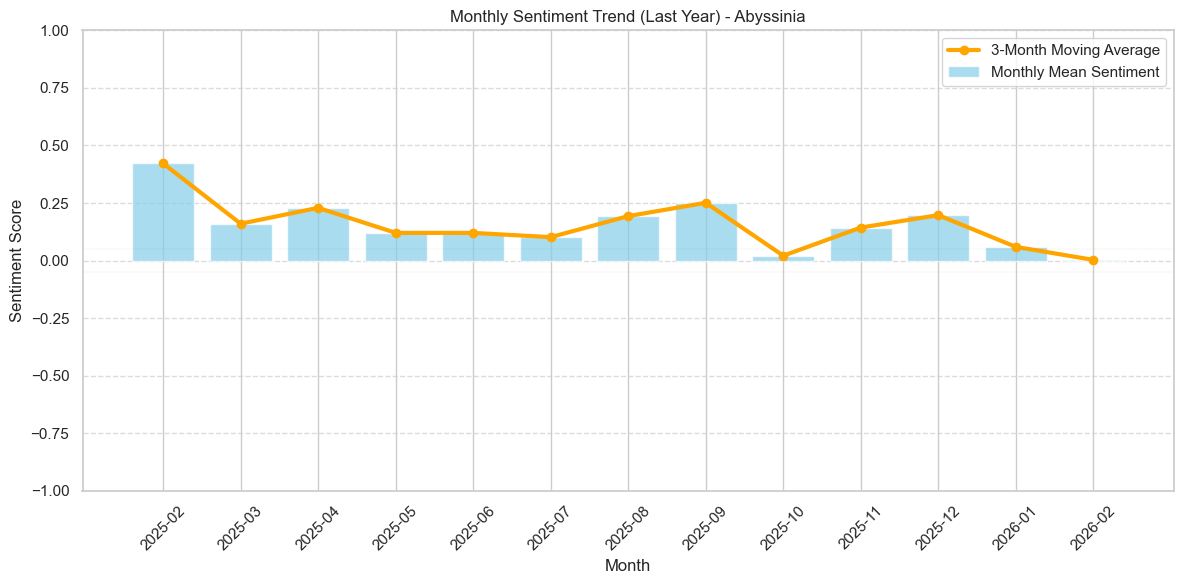

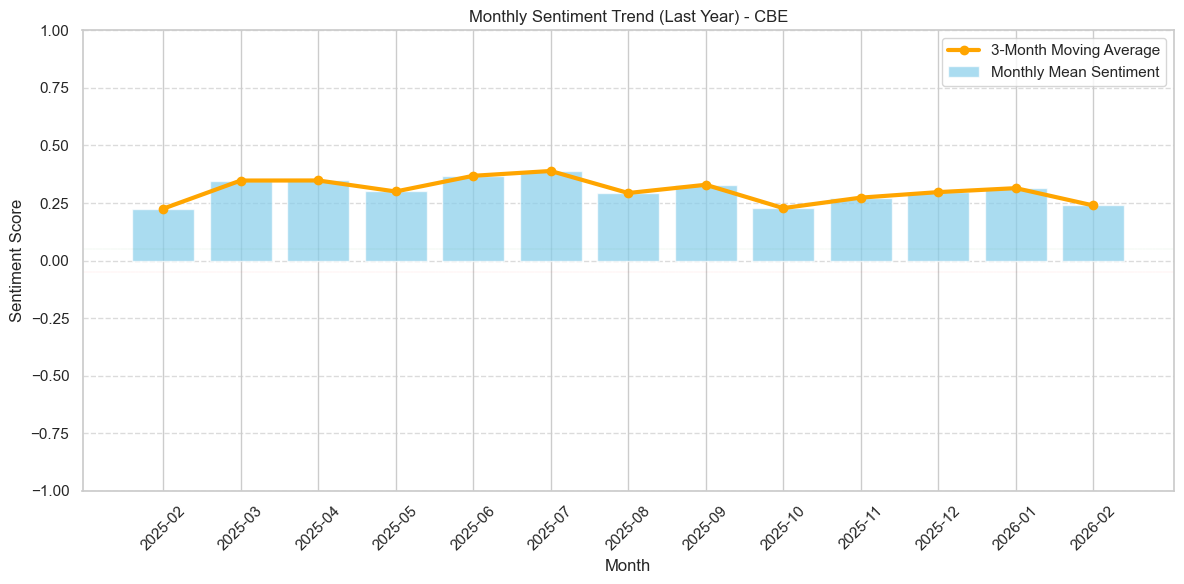

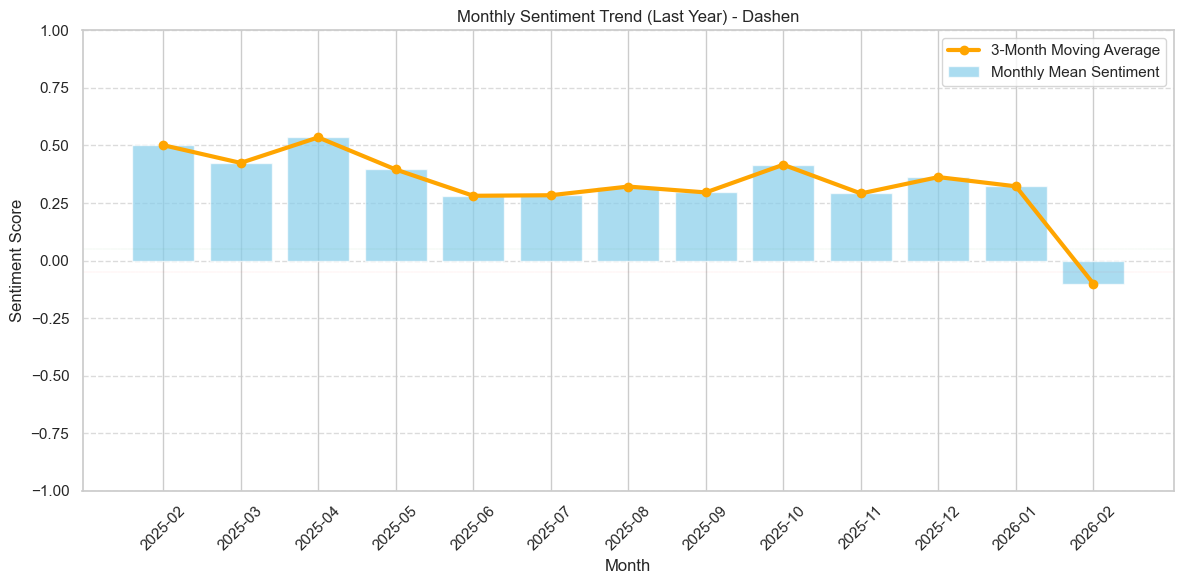

In [13]:
# Monthly Average Sentiment with Moving Average Trend
df_sentiment['review_date'] = pd.to_datetime(df_sentiment['review_date'])
one_year_ago = pd.Timestamp.now() - pd.DateOffset(years=1)
df_last_year = df_sentiment[df_sentiment['review_date'] >= one_year_ago].copy()

# Set review_date as index for resampling
df_last_year.set_index('review_date', inplace=True)

for bank in banks:
    # Filter for bank
    bank_data = df_last_year[df_last_year['bank_code'] == bank]
    
    # Resample to monthly mean
    monthly_sentiment = bank_data['sentiment_score'].resample('ME').mean()
    
    # Calculate 3-month rolling average (Moving Average)
    rolling_avg = monthly_sentiment.rolling(window=1).mean()
    
    # Plot
    plt.figure(figsize=(12, 6))
    
    # Bar chart for Monthly Average
    # We use the index (dates) for x-axis, formatted as YYYY-MM
    x_dates = monthly_sentiment.index.strftime('%Y-%m')
    plt.bar(x_dates, monthly_sentiment, color='skyblue', alpha=0.7, label='Monthly Mean Sentiment')
    
    # Line chart for Moving Average
    # We need to align the line plot with the bar plot x-axis
    plt.plot(x_dates, rolling_avg, color='orange', linewidth=3, marker='o', label='3-Month Moving Average')
    
    plt.title(f'Monthly Sentiment Trend (Last Year) - {bank}')
    plt.xlabel('Month')
    plt.ylabel('Sentiment Score')
    plt.ylim(-1, 1)
    ## to do figure out why the lines are not showing properly
    plt.axhline(0, color='black', linewidth=0)
    plt.axhline(0.05, color='green', linestyle='--', linewidth=0.05)
    plt.axhline(-0.05, color='red', linestyle='--', linewidth=0.05)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

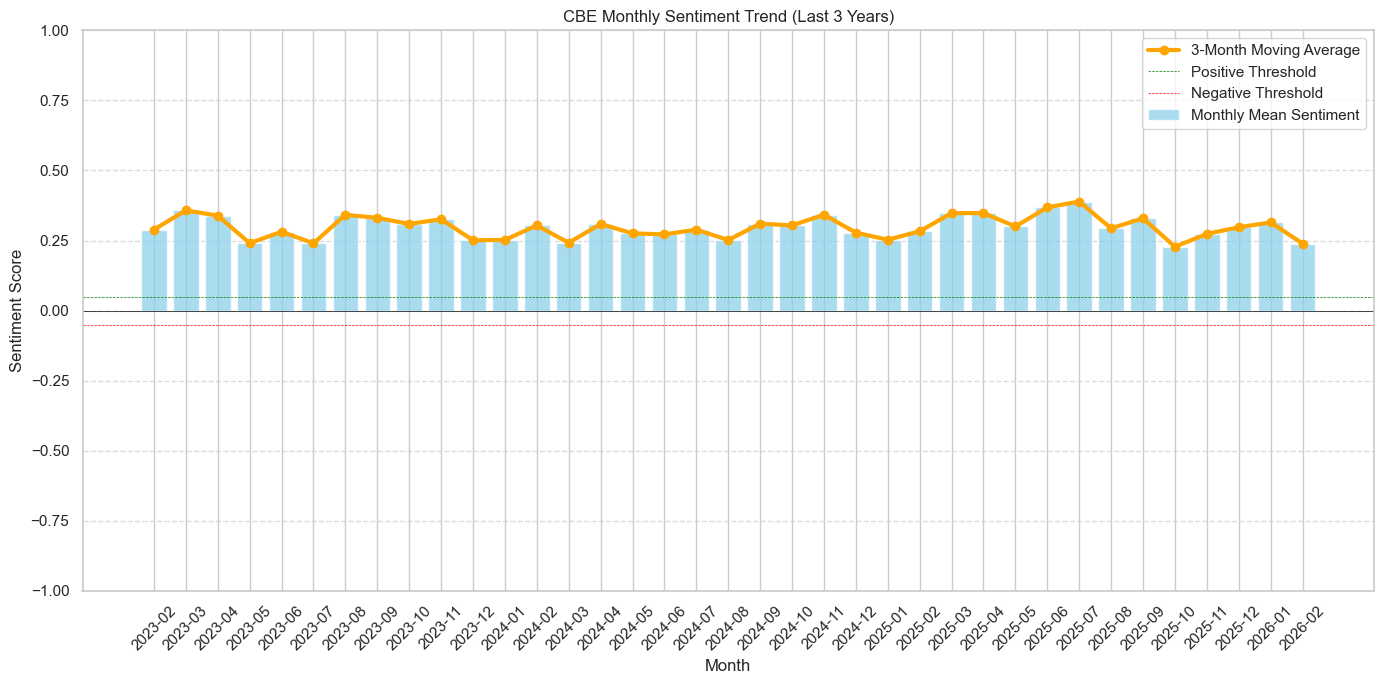

In [14]:
# CBE Sentiment Trend (Last 3 Years)
cbe_data = df_sentiment[df_sentiment['bank_code'] == 'CBE'].copy()
cbe_data['review_date'] = pd.to_datetime(cbe_data['review_date'])
cbe_data.set_index('review_date', inplace=True)

# Filter for last 3 years
three_years_ago = pd.Timestamp.now() - pd.DateOffset(years=3)
cbe_last_3_years = cbe_data[cbe_data.index >= three_years_ago]

# Resample to monthly mean
monthly_sentiment_cbe = cbe_last_3_years['sentiment_score'].resample('ME').mean()

# Calculate 3-month rolling average
rolling_avg_cbe = monthly_sentiment_cbe.rolling(window=1).mean()

# Plot
plt.figure(figsize=(14, 7))

# Bar chart for Monthly Average
x_dates_cbe = monthly_sentiment_cbe.index.strftime('%Y-%m')
plt.bar(x_dates_cbe, monthly_sentiment_cbe, color='skyblue', alpha=0.7, label='Monthly Mean Sentiment')

# Line chart for Moving Average
plt.plot(x_dates_cbe, rolling_avg_cbe, color='orange', linewidth=3, marker='o', label='3-Month Moving Average')

plt.title('CBE Monthly Sentiment Trend (Last 3 Years)')
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.ylim(-1, 1)
plt.axhline(0, color='black', linewidth=0.5)
plt.axhline(0.05, color='green', linestyle='--', linewidth=0.5, label='Positive Threshold')
plt.axhline(-0.05, color='red', linestyle='--', linewidth=0.5, label='Negative Threshold')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()